<a href="https://colab.research.google.com/github/novalsaputra/simulasi_skripsi/blob/master/kodingan_skripsi_noval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [ ]:
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp1"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp2"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp3"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp4"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp5"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp6"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp7"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp8"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp9"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp10"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp11"
!wget "https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp12"
 
!mv /content/tp1 /content/tp1.txt
!mv /content/tp2 /content/tp2.txt
!mv /content/tp3 /content/tp3.txt
!mv /content/tp4 /content/tp4.txt
!mv /content/tp5 /content/tp5.txt
!mv /content/tp6 /content/tp6.txt
!mv /content/tp7 /content/tp7.txt
!mv /content/tp8 /content/tp8.txt
!mv /content/tp9 /content/tp9.txt
!mv /content/tp10 /content/tp10.txt
!mv /content/tp11 /content/tp11.txt
!mv /content/tp12 /content/tp12.txt
 
 
# data
import numpy as np
t1 = np.loadtxt("/content/tp1.txt", comments="#", unpack=False)
t2 = np.loadtxt("/content/tp2.txt", comments="#",  unpack=False)
t3 = np.loadtxt("/content/tp3.txt", comments="#",  unpack=False)
t4 = np.loadtxt("/content/tp4.txt", comments="#",  unpack=False)
t5 = np.loadtxt("/content/tp5.txt", comments="#",  unpack=False)
t6 = np.loadtxt("/content/tp6.txt", comments="#",  unpack=False)
t7 = np.loadtxt("/content/tp7.txt", comments="#",  unpack=False)
t8 = np.loadtxt("/content/tp8.txt", comments="#",  unpack=False)
t9 = np.loadtxt("/content/tp9.txt", comments="#",  unpack=False)
t10 = np.loadtxt("/content/tp10.txt", comments="#",  unpack=False)
t11 = np.loadtxt("/content/tp11.txt", comments="#",  unpack=False)
t12 = np.loadtxt("/content/tp12.txt", comments="#",  unpack=False)
D = np.array([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12])

--2020-07-11 08:15:42--  https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp1
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1154968 (1.1M) [text/plain]
Saving to: ‘tp1’

tp1                 100%[===================>]   1.10M  --.-KB/s    in 0.08s   

2020-07-11 08:15:42 (13.0 MB/s) - ‘tp1’ saved [1154968/1154968]

--2020-07-11 08:15:44--  https://raw.githubusercontent.com/IadityaM/NSGA2/master/dataset-EMOA-delta-TRIMAX/GSE35671/tp2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1154934 (1.1M) [te

In [ ]:
#for i in range(3):
print(np.min(D[:,:,:]))
print(np.max(D[:,:,:]))

6.47132
15.604


In [ ]:
D.shape

(12, 48803, 3)

# Penentuan Delta

## Pengclusteran dengan**Elbow Method**


In [ ]:
#fungsi untuk menghitung msr
def MSR(D):
    m_iJ = np.mean(D,axis=1)
    m_Ij = np.mean(D, axis=0)
    m_IJ = np.mean(D)
    
    m_iJ_s = m_iJ.shape
    m_Ij_s = m_Ij.shape
    
    if (m_iJ_s == (1,) ) or (m_Ij_s == (1,)):
        msr = np.nan
    else:
        residu = D - np.expand_dims(m_iJ,axis=1) - np.expand_dims(m_Ij,axis=0) + m_IJ
        sr = np.square(residu)
        msr = np.mean(sr)
    return msr

pengclusteran gen terhadap waktu pada masing masing kondisi.
berikut adalah hasil pengclusteran


In [ ]:
# elbow methode
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df1 = np.transpose(D[:,:,0])
df2 = np.transpose(D[:,:,1])
df3 = np.transpose(D[:,:,2])
df = [df1,df2,df3]


wsst = []
K = range(1,15)
for df in df:
  wss = []
  for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    wss.append(kmeanModel.inertia_)
  wsst.append(wss)


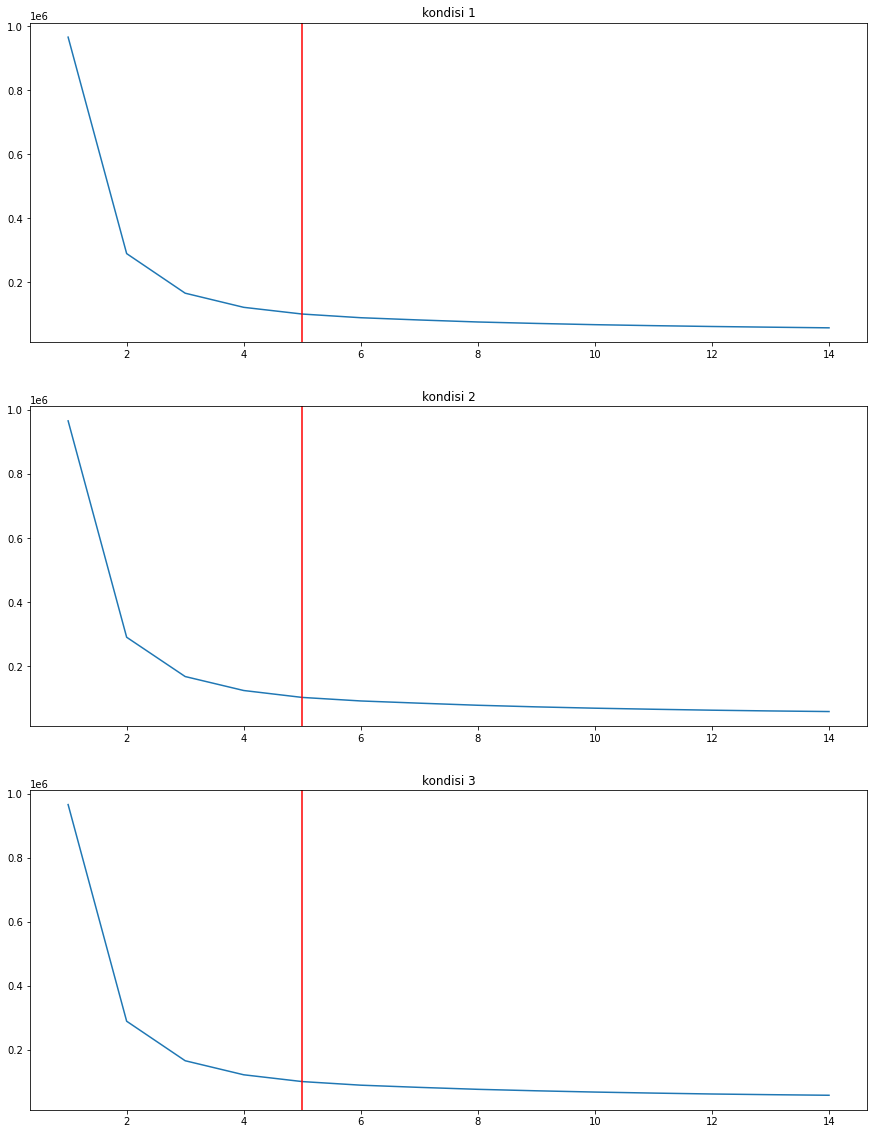

In [ ]:
#plt.figure(figsize=(45,15))
fig, ax = plt.subplots(3,figsize=(15,20))

ax[0].plot(K,wsst[0])
ax[0].set_title("kondisi 1")
ax[0].axvline(5,c='red')

ax[1].plot(K,wsst[1])
ax[1].set_title("kondisi 2")
ax[1].axvline(5,c='red')

ax[2].plot(K,wsst[2])
ax[2].set_title("kondisi 3")
ax[2].axvline(5,c='red')

dari hasil plot tersebut diperoleh bahwa cluster untuk setiap kondisi adalah 4.

selanjutnya dicari cluster waktu terhadap gen dari hasil cluster yang telah didapatkan sebelumnya.

Pengclusteran untuk kondisi 1

In [ ]:
#kondisi 1
# misalkan cluster optimal gen terhadap waktu adalah 4
from sklearn.cluster import KMeans
n = 5
clus = KMeans(n_clusters=n,init='random')
d = D[:,:,0].transpose()
clus.fit(d)
idx = clus.predict(d)

d[idx==0]
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df1 = d[idx==0].transpose()
df2 = d[idx==1].transpose()
df3 = d[idx==2].transpose()
df4 = d[idx==3].transpose()
df5 = d[idx==4].transpose()
df = [df1,df2,df3,df4,df5]


wss_k1 = []
K = range(1,10)
for df in df:
  wss = []
  idx_cluster=[]
  for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    wss.append(kmeanModel.inertia_)
  wss_k1.append(wss)



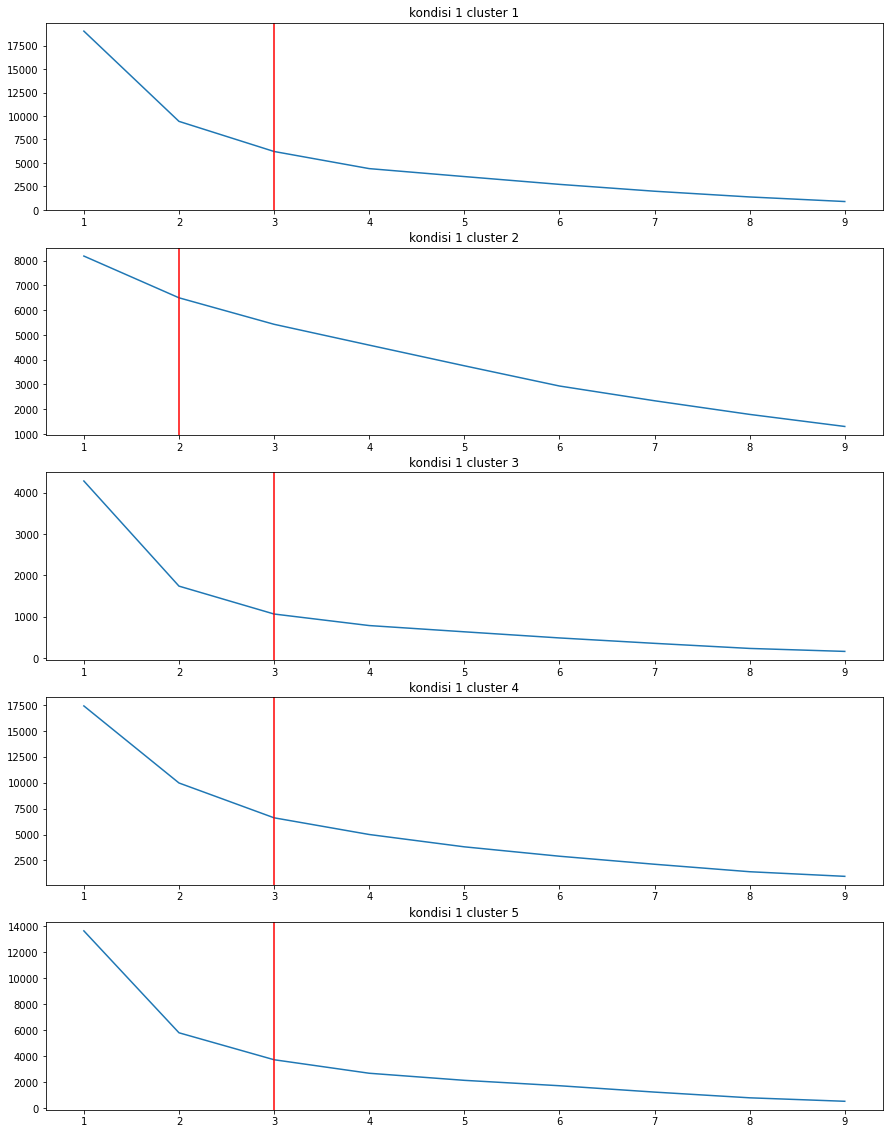

In [ ]:
fig, ax = plt.subplots(5,figsize=(15,20))
ax[0].plot(K,wss_k1[0])
ax[0].set_title("kondisi 1 cluster 1")
ax[0].axvline(3,c='red')

ax[1].plot(K,wss_k1[1])
ax[1].set_title("kondisi 1 cluster 2")
ax[1].axvline(2,c='red')

ax[2].plot(K,wss_k1[2])
ax[2].set_title("kondisi 1 cluster 3")
ax[2].axvline(3,c='red')

ax[3].plot(K,wss_k1[3])
ax[3].set_title("kondisi 1 cluster 4")
ax[3].axvline(3,c='red')

ax[4].plot(K,wss_k1[4])
ax[4].set_title("kondisi 1 cluster 5")
ax[4].axvline(3,c='red')

Pengclusteran untuk kondisi 2

In [ ]:
#kondisi 2
from sklearn.cluster import KMeans
n = 5
clus = KMeans(n_clusters=n,init='random')
d = D[:,:,1].transpose()
clus.fit(d)
idx = clus.predict(d)

d[idx==0]
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df1 = d[idx==0].transpose()
df2 = d[idx==1].transpose()
df3 = d[idx==2].transpose()
df4 = d[idx==3].transpose()
df5 = d[idx==4].transpose()
df = [df1,df2,df3,df4,df5]


wss_k2 = []
K = range(1,10)
for df in df:
  wss = []
  idx_cluster=[]
  for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    wss.append(kmeanModel.inertia_)
  wss_k2.append(wss)


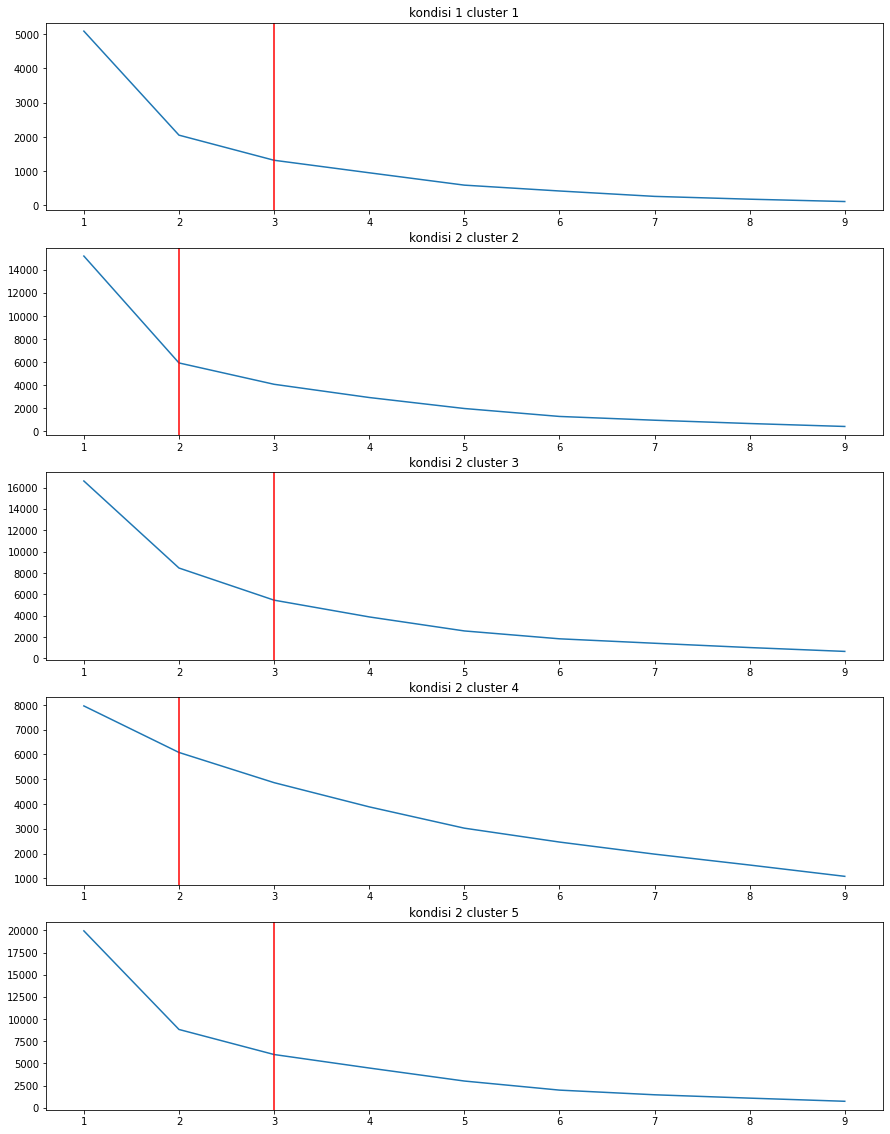

In [ ]:
fig, ax = plt.subplots(5,figsize=(15,20))
ax[0].plot(K,wss_k2[0])
ax[0].set_title("kondisi 1 cluster 1")
ax[0].axvline(3,c='red')

ax[1].plot(K,wss_k2[1])
ax[1].set_title("kondisi 2 cluster 2")
ax[1].axvline(2,c='red')

ax[2].plot(K,wss_k2[2])
ax[2].set_title("kondisi 2 cluster 3")
ax[2].axvline(3,c='red')

ax[3].plot(K,wss_k2[3])
ax[3].set_title("kondisi 2 cluster 4")
ax[3].axvline(2,c='red')

ax[4].plot(K,wss_k2[4])
ax[4].set_title("kondisi 2 cluster 5")
ax[4].axvline(3,c='red')

Pengclusteran untuk kondisi 3

In [ ]:
#kondisi 3
from sklearn.cluster import KMeans
n = 5
clus = KMeans(n_clusters=n,init='random')
d = D[:,:,2].transpose()
clus.fit(d)
ind = clus.predict(d)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df1 = d[ind==0].transpose()
df2 = d[ind==1].transpose()
df3 = d[ind==2].transpose()
df4 = d[ind==3].transpose()
df5 = d[ind==4].transpose()
df = [df1,df2,df3,df4,df5]


wss_k3 = []
K = range(1,10)
for df in df:
  wss = []
  idx_cluster=[]
  for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    wss.append(kmeanModel.inertia_)
  wss_k3.append(wss)


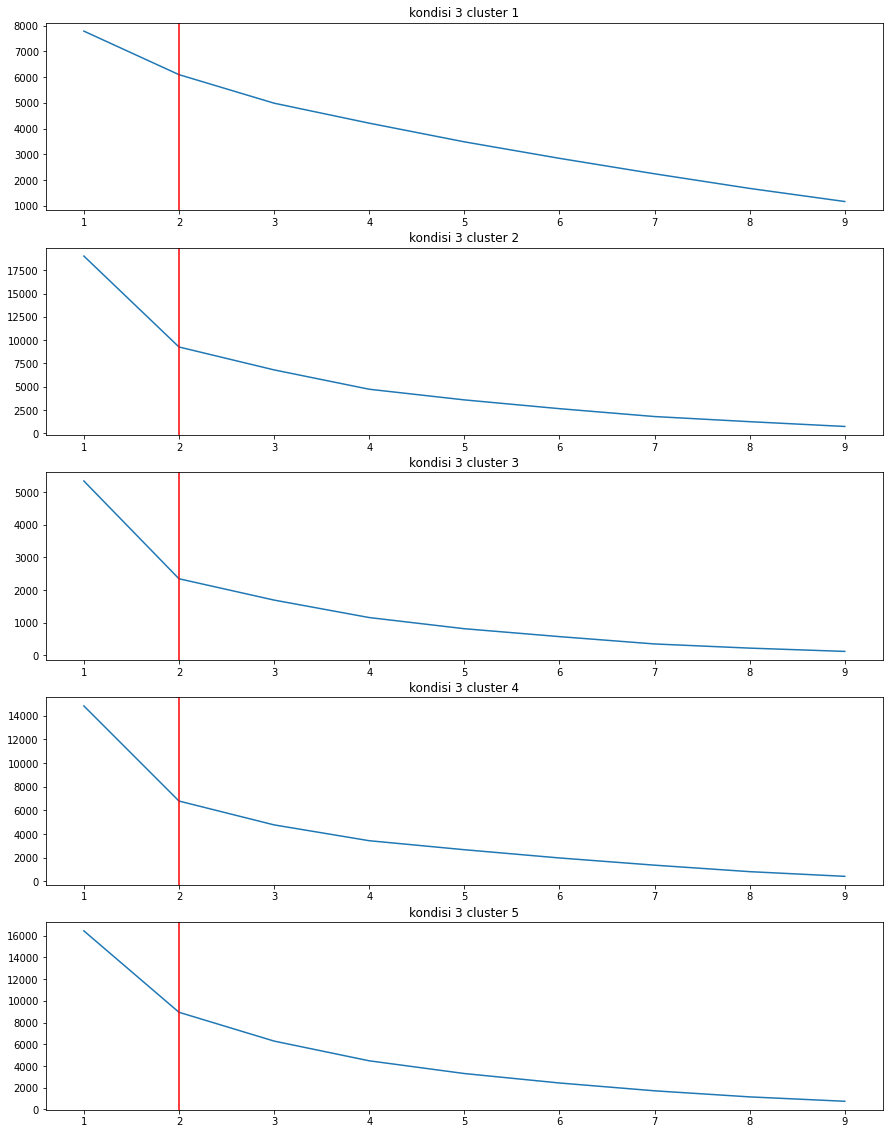

In [ ]:
fig, ax = plt.subplots(5,figsize=(15,20))
ax[0].plot(K,wss_k3[0])
ax[0].set_title("kondisi 3 cluster 1")
ax[0].axvline(2,c='red')

ax[1].plot(K,wss_k3[1])
ax[1].set_title("kondisi 3 cluster 2")
ax[1].axvline(2,c='red')

ax[2].plot(K,wss_k3[2])
ax[2].set_title("kondisi 3 cluster 3")
ax[2].axvline(2,c='red')

ax[3].plot(K,wss_k3[3])
ax[3].set_title("kondisi 3 cluster 4")
ax[3].axvline(2,c='red')

ax[4].plot(K,wss_k3[4])
ax[4].set_title("kondisi 3 cluster 5")
ax[4].axvline(2,c='red')

**Kesimpulan**
* kondisi 1 terdiri dari 4 cluster, hasil pengclusteran selanjutnya adalah 3, 2, 3, 3, 3
* kondisi 2 terdiri dari 4 cluster, hasil pengclusteran selanjutnya 3, 2, 3, 2, 3
* kondisi 3 terdiri dari 4 cluster, hasil pengclusteran selanjutnya 2, 2, 2, 2, 2


In [ ]:
from sklearn.cluster import KMeans
n1=5
n2 = [[3,2,3,3,3],[3,2,3,2,3],[2,2,2,2,2]] #banyak cluster waktu terhadap gen
#km1 = KMeans(n_clusters=n, init='random') 
#km2 = KMeans(n_clusters=3, init='random') 
kumpulan_cluster = []
for i in range(3):
    d = D[:,:,i].transpose()
    km1 = KMeans(n_clusters=n1, init='random')
    km1.fit(d)
    y = km1.predict(d)
    for j in range(n1):
        dd = d[y==j].transpose()
        n = n2[i][j]
        km2 = KMeans(n_clusters=n, init='random')
        km2.fit(dd)
        yy = km2.predict(dd)

        for k in range(n2[i][j]):        
          kumpulan_cluster.append(dd[yy==k])

In [ ]:
# penghitungan msr
msr = []
for cluster in kumpulan_cluster:
    s = MSR(cluster)
    msr.append(s)

msr = np.array(msr)

# 5 nilai MSR terendah sebagai delta
print("nilai msr setiap cluster")
print(msr)
print('\n')
print("msr diurutkan")
print(np.sort(msr))

nilai msr setiap cluster
[0.07658605 0.16832841 0.07645072 0.17336872 0.11267588 0.03717462
 0.17424841 0.16364441 0.11946603 0.08307636 0.061476   0.01437444
 0.01064043 0.00894919 0.18416053 0.05813307 0.13729242 0.24971699
 0.13317436 0.18057884 0.10805352 0.03581754 0.07494461 0.17990979
 0.00688228        nan 0.01404119 0.18744189 0.21502793 0.17566395
 0.29489073 0.09208184 0.17295498 0.15963074 0.23905089 0.01357981
 0.01558174]


msr diurutkan
[0.00688228 0.00894919 0.01064043 0.01357981 0.01404119 0.01437444
 0.01558174 0.03581754 0.03717462 0.05813307 0.061476   0.07494461
 0.07645072 0.07658605 0.08307636 0.09208184 0.10805352 0.11267588
 0.11946603 0.13317436 0.13729242 0.15963074 0.16364441 0.16832841
 0.17295498 0.17336872 0.17424841 0.17566395 0.17990979 0.18057884
 0.18416053 0.18744189 0.21502793 0.23905089 0.24971699 0.29489073
        nan]


Kodingan awal penentuan delta

In [ ]:
#pengclusteran:  (gen terhadap waktu) -> waktu terhadap gen 
from sklearn.cluster import KMeans
n=5 #banyak cluster gen terhadap waktu
km1 = KMeans(n_clusters=n, init='random') 
km2 = KMeans(n_clusters=3, init='random') 
m = []
for k in range(3):
    d = D[:,:,k].transpose()
    km1.fit(d)
    y = km1.predict(d)
    for kk in range(n):
        dd = d[y==kk].transpose()
        km2.fit(dd)
        yy = km2.predict(dd)
        
        m.append(dd[yy==0])
        m.append(dd[yy==1])

In [ ]:
# penghitungan msr
msr = []
for i in m:
    s = MSR(i)
    msr.append(s)

msr = np.array(msr)

# 5 nilai MSR terendah sebagai delta
np.sort(msr)

array([0.00688228, 0.00845386, 0.01064043, 0.01279137, 0.01288019,
       0.01404119, 0.03581754, 0.04394749, 0.04741906, 0.05126447,
       0.061476  , 0.06549761, 0.07494461, 0.07645072, 0.07954536,
       0.07967833, 0.08695511, 0.10578362, 0.10722464, 0.10805352,
       0.10909796, 0.11111198, 0.11267588, 0.11946603, 0.1242351 ,
       0.13729242, 0.15421647, 0.16048942, 0.16832841, 0.17566395])

In [ ]:
msr

array([0.13929408, 0.22195881, 0.17428932, 0.18673448, 0.00753335,
       0.01148946, 0.03501721, 0.14681656, 0.30286108, 0.12452054,
       0.32638334, 0.51167967, 0.04096556, 0.06426487, 0.19687251,
       0.13811094, 0.12904808, 0.11077592, 0.16244792, 0.1363068 ,
       0.01034221, 0.00890701, 0.13057118, 0.20055162, 0.40273987,
       0.20822881, 0.14855198, 0.12944925, 0.09103347, 0.03328562,
       0.21539505, 0.11844264, 0.11317737, 0.275189  , 0.17693518,
       0.13036239, 0.08380576, 0.10644921, 0.0843229 , 0.39799462,
       0.42447716, 0.33992404, 0.08901869, 0.17492608, 0.30579757,
       0.10495302, 0.14324067, 0.22048422, 0.0465842 , 0.08179728,
       0.21210286, 0.25213509, 0.15862783, 0.21254678, 0.14907316,
       0.13348031, 0.20420813, 0.13614376, 0.00976732, 0.01154837])

In [ ]:
np.sort(np.random.choice(msr,30))

## Pengclusteran dengan Silhouette method

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df1 = np.transpose(D[:,:,0])
df2 = np.transpose(D[:,:,1])
df3 = np.transpose(D[:,:,2])
df = [df1,df2,df3]


sil_skor = []
K = range(2,15)
for df in df:
  skor = []
  for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    ss = silhouette_score(df,kmeanModel.labels_)
    skor.append(ss)
  sil_skor.append(skor)

[0.7738006219476411,
 0.7264785938858841,
 0.6781616954189854,
 0.6317347735573122,
 0.5864610771012373,
 0.5470052885246913,
 0.5543279970477459,
 0.5364493304450989,
 0.5100319793482794,
 0.43432142047576355,
 0.4140052520202539,
 0.4113272569638275,
 0.37502694720107893]

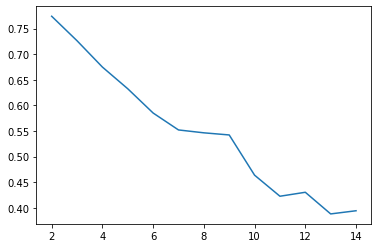

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
ax.plot(range(2,15),sil_skor[0])
sil_skor[2]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmean = KMeans(n_clusters=4)
kmean.fit(D[:,:,0].transpose())
silhouette_score(D[:,:,0].transpose(),kmean.labels_)

0.6747963029449555

In [ ]:
fig, ax = plt.subplots(3,figsize=(15,20))

ax[0].plot(K,wsst[0])
ax[0].set_title("kondisi 1")
ax[0].axvline(5,c='red')

ax[1].plot(K,wsst[1])
ax[1].set_title("kondisi 2")
ax[1].axvline(5,c='red')

ax[2].plot(K,wsst[2])
ax[2].set_title("kondisi 3")
ax[2].axvline(5,c='red')

# DeltaTrimax

In [ ]:
import numpy as np
import sys
import time

class DeltaTrimax():
    def __init__(self,D):
        self.D = D.copy()
        self.D_asli = D.copy()
    
    def hitung_MSR(self, gene, kondisi, waktu, g_add=False, k_add=False, w_add=False):
        
        
        gene_idx = np.expand_dims(np.expand_dims(np.nonzero(gene)[0],axis=0),axis=2)
        #
        waktu_idx = np.expand_dims(np.expand_dims(np.nonzero(waktu)[0],axis=1),axis=1)
        #
        kondisi_idx = np.expand_dims(np.expand_dims(np.nonzero(kondisi)[0],axis=0),axis=0)
        
        
        subarr = self.D[waktu_idx, gene_idx, kondisi_idx]
        self.n_gene = subarr.shape[1]
        self.n_kondisi = subarr.shape[2]
        self.n_waktu = subarr.shape[0]
        
        
        # hitung m_iJK (gene)
        m_iJK = np.nanmean(np.nanmean(subarr,axis=2),axis=0)
        m_iJK = np.expand_dims(np.expand_dims(m_iJK,axis=0),axis=2)
        
        # hitung m_IjK (kondisi)
        m_IjK = np.nanmean(np.nanmean(subarr,axis=0),axis=0)
        m_IjK = np.expand_dims(np.expand_dims(m_IjK,axis=0),axis=1)
        
        # hitung m_IJk (waktu)
        m_IJk = np.nanmean(np.nanmean(subarr,axis=2),axis=1)
        m_IJk = np.expand_dims(np.expand_dims(m_IJk,axis=1),axis=2)
        
        # hitung m_IJK
        m_IJK = np.mean(subarr)
        
        # hitung MSR
        residue = subarr - m_iJK - m_IjK - m_IJk + (2*m_IJK)
        SR = np.square(residue)
        self.MSR = np.mean(SR)
        self.MSR_gene = np.nanmean(np.nanmean(SR,axis=2),axis=0)
        self.MSR_kondisi = np.nanmean(np.nanmean(SR,axis=0),axis=0)
        self.MSR_waktu = np.nanmean(np.nanmean(SR,axis=2),axis=1)
        
        #untuk node addition
        #self.D_asli = self.D
        
        if g_add:
            non_gene = np.expand_dims(np.expand_dims(np.nonzero(gene==0)[0],axis=0),axis=2)
            
            
            # hitung m_iJK (untuk gene yang bukan tricluster dari data asli)
            D_b = self.D.copy()
            D_b[waktu_idx,non_gene, kondisi_idx] = self.D_asli[waktu_idx, non_gene, kondisi_idx]

            subarr_b = D_b[waktu_idx, non_gene, kondisi_idx]

            m_iJK_b = np.nanmean(np.nanmean(subarr_b,axis=2),axis=0)
            m_iJK_b = np.expand_dims(np.expand_dims(m_iJK_b,axis=0),axis=2)
            
            r = subarr_b - m_iJK_b - m_IjK - m_IJk + (2*m_IJK)
            sr_b = np.square(r)
            self.MSR_gene_b = np.nanmean(np.nanmean(sr_b,axis=2),axis=0)
            
        
        if k_add:
            non_kondisi = np.expand_dims(np.expand_dims(np.nonzero(kondisi==0)[0],axis=0),axis=0)
            
            # hitung m_IjK (untuk kondisi yg bukan tricluster)
            D_b = self.D.copy()
            D_b[waktu_idx,gene_idx, non_kondisi] = self.D_asli[waktu_idx,gene_idx, non_kondisi]
            subarr_b = D_b[waktu_idx,gene_idx, non_kondisi]

            m_IjK_b = np.nanmean(np.nanmean(subarr_b,axis=0),axis=0)
            m_IjK_b = np.expand_dims(np.expand_dims(m_IjK_b,axis=0),axis=1)
            
            r = subarr_b - m_iJK - m_IjK_b - m_IJk + (2*m_IJK)
            sr_b = np.square(r)
            self.MSR_kondisi_b = np.nanmean(np.nanmean(sr_b,axis=0),axis=0)
        
        if w_add:
            non_waktu = np.expand_dims(np.expand_dims(np.nonzero(waktu==0)[0],axis=1),axis=1)
            
            # hitung m_IJk (untuk waktu yg bukan tricluster)
            D_b = self.D.copy()
            D_b[non_waktu, gene_idx, kondisi_idx] = self.D_asli[non_waktu, gene_idx, kondisi_idx]
            subarr_b = D_b[non_waktu, gene_idx, kondisi_idx]

            m_IJk_b = np.nanmean(np.nanmean(subarr_b,axis=2),axis=1)
            m_IJk_b = np.expand_dims(np.expand_dims(m_IJk_b,axis=1),axis=2)

            r = subarr_b - m_iJK - m_IjK - m_IJk_b + (2*m_IJK)
            sr_b = np.square(r)
            self.MSR_waktu_b = np.nanmean(np.nanmean(sr_b,axis=2),axis=1)
       

    def multiple_node_deletion(self, gene, kondisi, waktu):
        self.hitung_MSR(gene, kondisi, waktu)
        #i = 1
        self.muldel = 1
        while (self.MSR > self.delta):
            #print("mnd ke", i,"--MSR",self.MSR)
            hapus = 0
            
            # hapus gene
            if (self.n_gene > self.gene_cutoff):
                gene_dihapus = self.MSR_gene > (self.MSR * self.lamda)
                nonz_idx = gene.nonzero()[0]
                if gene_dihapus.any():
                    hapus = 1
                gene.put(nonz_idx[gene_dihapus],0)
                # hitung kembali msr
                self.hitung_MSR(gene, kondisi, waktu)
                
            # hapus kondisi
            if (self.n_kondisi > self.kondisi_cutoff):
                kondisi_dihapus = self.MSR_kondisi > (self.MSR * self.lamda)
                nonz_idx = kondisi.nonzero()[0]
                if kondisi_dihapus.any():
                    hapus = 1
                kondisi.put(nonz_idx[kondisi_dihapus],0)
                # hitung kembali msr
                self.hitung_MSR(gene, kondisi, waktu)
                
            # hapus waktu
            if (self.n_waktu > self.waktu_cutoff):
                waktu_dihapus = self.MSR_waktu > (self.MSR * self.lamda)
                nonz_idx = waktu.nonzero()[0]
                if waktu_dihapus.any():
                    hapus = 1
                waktu.put(nonz_idx[waktu_dihapus],0)
                # hitung kembali msr
                self.hitung_MSR(gene, kondisi, waktu)
            
            # menghentikan iterasi
            if not hapus:
                break
            sys.stdout.write('\r multiple deletion {} - single deletion {} - node additon {}'.format(
                self.muldel, self.singdel, self.nodeadd
            ))
            sys.stdout.flush()

            #i += 1
            self.muldel += 1

            
        #print("MSR akhir multiple node addition :",self.MSR)
        return gene, kondisi, waktu
  
    def single_node_deletion(self, gene, kondisi, waktu):
        self.hitung_MSR(gene, kondisi, waktu)
        #print("MSR awal snd",self.MSR)
        #i = 1
        self.singdel = 1
        while (self.MSR > self.delta):
            #print("snd ke-", i, "---MSR",self.MSR)
            
            gene_max = np.argmax(self.MSR_gene)
            kondisi_max = np.argmax(self.MSR_kondisi)
            waktu_max = np.argmax(self.MSR_waktu)
            
            if (self.MSR_gene[gene_max] > self.MSR_kondisi[kondisi_max]):
                if (self.MSR_gene[gene_max] > self.MSR_waktu[waktu_max]):
                    # Hapus Gene
                    nonz_idx = gene.nonzero()[0]
                    #print("menghapus gen ke-",gene_max)
                    gene.put(nonz_idx[gene_max],0)
                else:
                    # Hapus waktu
                    nonz_idx = waktu.nonzero()[0]
                    waktu.put(nonz_idx[waktu_max],0)
                    #print("menghapus waktu ke-",waktu_max)
            else:
                if (self.MSR_kondisi[kondisi_max] > self.MSR_waktu[waktu_max]):
                    # Hapus Kondisi
                    nonz_idx = kondisi.nonzero()[0]
                    kondisi.put(nonz_idx[kondisi_max],0)
                    #print("menghapus kondisi ke-",kondisi_max)
                else:
                    # Hapus Waktu
                    nonz_idx = waktu.nonzero()[0]
                    waktu.put(nonz_idx[waktu_max],0)
                    #print("menghapus waktu ke-",waktu_max)
            
            sys.stdout.write('\r multiple deletion {} - single deletion {} - node additon {}'.format(
                self.muldel, self.singdel, self.nodeadd
            ))
            sys.stdout.flush()
            
            #i+=1
            self.singdel += 1
            self.hitung_MSR(gene, kondisi, waktu)


        #print("MSR akhir single node deletion :", self.MSR)
        return gene, kondisi, waktu
                    
    def node_addition(self, gene, kondisi, waktu):
        self.hitung_MSR(gene, kondisi, waktu)
        #print("MSR awal node addition :",self.MSR)
        #i = 1
        self.nodeadd = 1
        while True:
            #print("node addition ke-",i)
            
            self.hitung_MSR(gene, kondisi, waktu)
            
            #penambaha gen
            self.hitung_MSR(gene, kondisi, waktu, g_add=True)
            no_gene_idx = np.nonzero(gene==0)[0]
            gene_to_add = self.MSR_gene_b < self.MSR
            if gene_to_add.any():
              gene.put(no_gene_idx[gene_to_add],1)

              g_idx = np.expand_dims(np.expand_dims(no_gene_idx[gene_to_add],axis=0),axis=2)
              k_idx = np.expand_dims(np.expand_dims(np.nonzero(kondisi)[0],axis=0),axis=0)
              w_idx = np.expand_dims(np.expand_dims(np.nonzero(waktu)[0],axis=1),axis=2)

              self.D[w_idx, g_idx, k_idx] = self.D_asli[w_idx, g_idx, k_idx]
             
            self.hitung_MSR(gene, kondisi, waktu)
             
            #penambahan kondisi
            self.hitung_MSR(gene, kondisi, waktu, k_add =True)
            no_kondisi = np.nonzero(kondisi==0)[0]
            kondisi_to_add = self.MSR_kondisi_b < self.MSR
            if kondisi_to_add.any():
              kondisi.put(no_kondisi[kondisi_to_add],1)

              g_idx = np.expand_dims(np.expand_dims(np.nonzero(gene)[0],axis=0),axis=2)
              k_idx = np.expand_dims(np.expand_dims(no_kondisi[kondisi_to_add],axis=0),axis=0)
              w_idx = np.expand_dims(np.expand_dims(np.nonzero(waktu)[0],axis=1),axis=2)

              self.D[w_idx, g_idx, k_idx] = self.D_asli[w_idx, g_idx, k_idx]
             
            self.hitung_MSR(gene, kondisi, waktu)
             
            #penambaha waktu
            self.hitung_MSR(gene, kondisi, waktu, w_add=True)
            no_waktu = np.nonzero(waktu==0)[0]
            waktu_to_add = self.MSR_waktu_b < self.MSR
            if waktu_to_add.any():
              waktu.put(no_waktu[waktu_to_add],1)

              g_idx = np.expand_dims(np.expand_dims(np.nonzero(gene)[0],axis=0),axis=2)
              k_idx = np.expand_dims(np.expand_dims(np.nonzero(kondisi)[0],axis=0),axis=0)
              w_idx = np.expand_dims(np.expand_dims(no_waktu[waktu_to_add],axis=1),axis=2)

              self.D[w_idx, g_idx, k_idx] = self.D_asli[w_idx, g_idx, k_idx]
             
            self.hitung_MSR(gene, kondisi, waktu)

            if not gene_to_add.any() and not kondisi_to_add.any() and not waktu_to_add.any():
                break
            
            sys.stdout.write('\r multiple deletion {} - single deletion {} - node additon {}'.format(
                self.muldel, self.singdel, self.nodeadd
            ))
            sys.stdout.flush()

            #i+=1
            self.nodeadd +=1
        #print("MSR akhir node addition :",self.MSR)
        return gene, kondisi, waktu
    
    
    def mask(self, gene, kondisi, waktu, minval, maxval):
        g = np.expand_dims(np.expand_dims(gene.nonzero()[0],axis=0),axis=2)
        k = np.expand_dims(np.expand_dims(kondisi.nonzero()[0],axis=0),axis=0)
        w = np.expand_dims(np.expand_dims(waktu.nonzero()[0],axis=1),axis=2)
        
        shape = np.count_nonzero(waktu), np.count_nonzero(gene), np.count_nonzero(kondisi)
        mask_val = np.random.uniform(self.minval, self.maxval, shape)
        self.D[w,g,k] = mask_val
    
    def fit(self, delta, lamda, n_triclusters=0):

        awal = time.time()
        
        n_waktu, n_gene, n_kondisi = self.D.shape
        
        self.delta = delta
        self.lamda = lamda
        
        # treshold untuk multiple node deletion
        self.gene_cutoff, self.kondisi_cutoff, self.waktu_cutoff = 50,50,50
        #nilai untuk masking
        self.minval = np.min(self.D)
        self.maxval = np.max(self.D)
        
        hasil_gen = []
        hasil_kondisi = []
        hasil_waktu = []
        
        msr = []

        i = 1
        
        while True:
            self.muldel = 0
            self.singdel =0
            self.nodeadd = 0

            print("Tricluster ",i)
            waktu = np.ones(n_waktu, dtype=np.bool)
            gene = np.ones(n_gene, dtype=np.bool)
            kondisi = np.ones(n_kondisi, dtype=np.bool)
            
            # Multiple Node Deletion
            gene, kondisi, waktu = self.multiple_node_deletion(gene, kondisi, waktu)
            
            # Single Node Deletion
            gene, kondisi, waktu = self.single_node_deletion(gene, kondisi, waktu)
            
            # Node Addition
            gene, kondisi, waktu = self.node_addition(gene, kondisi, waktu)
            
            #print("jumlah gen akhir", gene.sum())
            

            if (gene.sum()==1) or (kondisi.sum()==1) or (waktu.sum()==1):
                akhir = ((time.time()-awal)/60)
                print("\n Waktu Komputasi : {} menit".format(akhir))
                break
            
            print("\n------------- MSR: ",self.MSR)

            hasil_gen.append(gene)
            hasil_kondisi.append(kondisi)
            hasil_waktu.append(waktu)

            msr.append(self.MSR)

            if (n_triclusters == i):
                break
    
    
            # mask
            self.mask(gene, kondisi, waktu, self.minval, self.maxval)
            
            i+=1
            
        return hasil_gen, hasil_kondisi, hasil_waktu, msr



In [ ]:
a = DeltaTrimax(D)
g1,k1,w1, msr1 = a.fit(0.0068,1.15,n_triclusters=0)

In [ ]:
g2,k2,w2, msr2 = a.fit(0.0089,1.15,n_triclusters=0)

In [ ]:
g3,k3,w3, msr3 = a.fit(0.0106,1.15,n_triclusters=0)

In [ ]:
g4,k4,w4, msr4 = a.fit(0.0136,1.15,n_triclusters=0)

In [ ]:
g5,k5,w5, msr5 = a.fit(0.0140,1.15,n_triclusters=0)

In [ ]:
g6,k6,w6, msr6 = a.fit(0.0068,1.2,n_triclusters=0)

In [ ]:
g7,k7,w7, msr7 = a.fit(0.0089,1.2,n_triclusters=0)

In [ ]:
g8,k8,w8, msr8 = a.fit(0.0106,1.2,n_triclusters=0)

In [ ]:
g9,k9,w9, msr9 = a.fit(0.0136,1.2,n_triclusters=0)

In [ ]:
g10,k10,w10, msr10 = a.fit(0.0140,1.2,n_triclusters=0)

In [ ]:
g11,k11,w11, msr11 = a.fit(0.0068,1.25,n_triclusters=0)

In [ ]:
g12,k12,w12, msr12 = a.fit(0.0089,1.25,n_triclusters=0)

In [ ]:
g13,k13,w13, msr13 = a.fit(0.0106,1.25,n_triclusters=0)

In [ ]:
g14,k14,w14, msr14 = a.fit(0.0136,1.25,n_triclusters=0)

In [ ]:
g15,k15,w15, msr15 = a.fit(0.0140,1.25,n_triclusters=0)

#Analisis hasil simulasi


Import data

In [ ]:
!git clone https://github.com/novalsaputra/outputskripsi

Cloning into 'outputskripsi'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 534 (delta 0), reused 3 (delta 0), pack-reused 526
Receiving objects: 100% (534/534), 112.08 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (272/272), done.
Checking out files: 100% (80/80), done.


In [ ]:
import numpy as np
#simulasi 1
g1 = np.loadtxt('outputskripsi/simulasi_1/gen.txt'); g1 = g1.astype(bool)
k1 = np.loadtxt('outputskripsi/simulasi_1/kondisi.txt'); k1 =k1.astype(bool) 
w1 = np.loadtxt('outputskripsi/simulasi_1/waktu.txt'); w1 = w1.astype(bool)
msr1 = np.loadtxt('outputskripsi/simulasi_1/msr.txt')
 
#simulasi 2
g2 = np.loadtxt('outputskripsi/simulasi_2/gen.txt'); g2=g2.astype(bool)
k2 = np.loadtxt('outputskripsi/simulasi_2/kondisi.txt'); k2=k2.astype(bool)
w2 = np.loadtxt('outputskripsi/simulasi_2/waktu.txt'); w2=w2.astype(bool)
msr2 = np.loadtxt('outputskripsi/simulasi_2/msr.txt')
 
#simulasi 3
g3 = np.loadtxt('outputskripsi/simulasi_3/gen.txt'); g3=g3.astype(bool)
k3 = np.loadtxt('outputskripsi/simulasi_3/kondisi.txt'); k3=k3.astype(bool)
w3 = np.loadtxt('outputskripsi/simulasi_3/waktu.txt'); w3=w3.astype(bool)
msr3 = np.loadtxt('outputskripsi/simulasi_3/msr.txt')
 
#simulasi 4
g4 = np.loadtxt('outputskripsi/simulasi_4/gen.txt'); g4=g4.astype(bool)
k4 = np.loadtxt('outputskripsi/simulasi_4/kondisi.txt'); k4=k4.astype(bool)
w4 = np.loadtxt('outputskripsi/simulasi_4/waktu.txt'); w4=w4.astype(bool)
msr4 = np.loadtxt('outputskripsi/simulasi_4/msr.txt')
 
#simulasi 5
g5 = np.loadtxt('outputskripsi/simulasi_5/gen.txt'); g5=g5.astype(bool)
k5 = np.loadtxt('outputskripsi/simulasi_5/kondisi.txt'); k5=k5.astype(bool)
w5 = np.loadtxt('outputskripsi/simulasi_5/waktu.txt'); w5=w5.astype(bool)
msr5 = np.loadtxt('outputskripsi/simulasi_5/msr.txt')
 
#simulasi 6
g6 = np.loadtxt('outputskripsi/simulasi_6/gen6.txt'); g6=g6.astype(bool)
k6 = np.loadtxt('outputskripsi/simulasi_6/kondisi6.txt'); k6=k6.astype(bool)
w6 = np.loadtxt('outputskripsi/simulasi_6/waktu6.txt'); w6=w6.astype(bool)
msr6 = np.loadtxt('outputskripsi/simulasi_6/msr6.txt')
 
#simulasi 7
g7 = np.loadtxt('outputskripsi/simulasi_7/gen7.txt'); g7=g7.astype(bool)
k7 = np.loadtxt('outputskripsi/simulasi_7/kondisi7.txt'); k7=k7.astype(bool)
w7 = np.loadtxt('outputskripsi/simulasi_7/waktu7.txt'); w7=w7.astype(bool)
msr7 = np.loadtxt('outputskripsi/simulasi_7/msr7.txt')
 
#simulasi 8
g8 = np.loadtxt('outputskripsi/simulasi_8/gen8.txt'); g8=g8.astype(bool)
k8 = np.loadtxt('outputskripsi/simulasi_8/kondisi8.txt'); k8=k8.astype(bool)
w8 = np.loadtxt('outputskripsi/simulasi_8/waktu8.txt'); w8=w8.astype(bool)
msr8 = np.loadtxt('outputskripsi/simulasi_8/msr8.txt')
 
#simulasi 9
g9 = np.loadtxt('outputskripsi/simulasi_9/gen9.txt'); g9=g9.astype(bool)
k9 = np.loadtxt('outputskripsi/simulasi_9/kondisi9.txt'); k9=k9.astype(bool)
w9 = np.loadtxt('outputskripsi/simulasi_9/waktu9.txt'); w9=w9.astype(bool)
msr9 = np.loadtxt('outputskripsi/simulasi_9/msr9.txt')
 
#simulasi 10
g10 = np.loadtxt('outputskripsi/simulasi_10/gen10.txt'); g10=g10.astype(bool)
k10= np.loadtxt('outputskripsi/simulasi_10/kondisi10.txt'); k10=k10.astype(bool)
w10 = np.loadtxt('outputskripsi/simulasi_10/waktu10.txt'); w10=w10.astype(bool)
msr10 = np.loadtxt('outputskripsi/simulasi_10/msr10.txt')
 
#simulasi 11
g11 = np.loadtxt('outputskripsi/simulasi_11/gen11.txt'); g11=g11.astype(bool)
k11 = np.loadtxt('outputskripsi/simulasi_11/kondisi11.txt'); k11=k11.astype(bool)
w11= np.loadtxt('outputskripsi/simulasi_11/waktu11.txt'); w11=w11.astype(bool)
msr11 = np.loadtxt('outputskripsi/simulasi_11/msr11.txt')
 
#simulasi 12
g12 = np.loadtxt('outputskripsi/simulasi_12/gen12.txt'); g12=g12.astype(bool)
k12 = np.loadtxt('outputskripsi/simulasi_12/kondisi12.txt'); k12=k12.astype(bool)
w12 = np.loadtxt('outputskripsi/simulasi_12/waktu12.txt'); w12=w12.astype(bool)
msr12 = np.loadtxt('outputskripsi/simulasi_12/msr12.txt')
 
#simulasi 13
g13 = np.loadtxt('outputskripsi/simulasi_13/gen13.txt'); g13=g13.astype(bool)
k13= np.loadtxt('outputskripsi/simulasi_13/kondisi13.txt'); k13=k13.astype(bool)
w13= np.loadtxt('outputskripsi/simulasi_13/waktu13.txt'); w13=w13.astype(bool)
msr13 = np.loadtxt('outputskripsi/simulasi_13/msr13.txt')
 
#simulasi 14
g14 = np.loadtxt('outputskripsi/simulasi_14/gen14.txt'); g14=g14.astype(bool)
k14= np.loadtxt('outputskripsi/simulasi_14/kondisi14.txt'); k14=k14.astype(bool)
w14 = np.loadtxt('outputskripsi/simulasi_14/waktu14.txt'); w14=w14.astype(bool)
msr14 = np.loadtxt('outputskripsi/simulasi_14/msr14.txt')
 
#simulasi 15
g15 = np.loadtxt('outputskripsi/simulasi_15/gen15.txt'); g15=g15.astype(bool)
k15= np.loadtxt('outputskripsi/simulasi_15/kondisi15.txt'); k15=k15.astype(bool)
w15 = np.loadtxt('outputskripsi/simulasi_15/waktu15.txt'); w15=w15.astype(bool)
msr15 = np.loadtxt('outputskripsi/simulasi_15/msr15.txt')

kualitas setiap simulasi

In [ ]:
# Tricluster Quality Index pada masing-masing delta
 
def TQI(m,i,msr):
  x,y,z = m.shape
  v = x*y*z
  td = msr[i]/v
  return td
 
Q1 = []
for i in range(len(msr1)):
  m = D[w1[i]][:,g1[i]][:,:,k1[i]]
  Q1.append(TQI(m,i,msr1))
Q1 = np.array(Q1)

Q2 = []
for i in range(len(msr2)):
  m = D[w2[i]][:,g2[i]][:,:,k2[i]]
  Q2.append(TQI(m,i,msr2))
Q2 = np.array(Q2)
 
Q3 = []
for i in range(len(msr3)):
  m = D[w3[i]][:,g3[i]][:,:,k3[i]]
  Q3.append(TQI(m,i,msr3))
Q3 = np.array(Q3)

Q4 = []
for i in range(len(msr4)):
  m = D[w4[i]][:,g4[i]][:,:,k4[i]]
  Q4.append(TQI(m,i,msr4))
Q4 = np.array(Q4)

Q5 = []
for i in range(len(msr5)):
  m = D[w5[i]][:,g5[i]][:,:,k5[i]]
  Q5.append(TQI(m,i,msr5))
Q5 = np.array(Q5)

Q6 = []
for i in range(len(msr6)):
  m = D[w6[i]][:,g6[i]][:,:,k6[i]]
  Q6.append(TQI(m,i,msr6))
Q6 = np.array(Q6)

Q7 = []
for i in range(len(msr7)):
  m = D[w7[i]][:,g7[i]][:,:,k7[i]]
  Q7.append(TQI(m,i,msr7))
Q7 = np.array(Q7)

Q8 = []
for i in range(len(msr8)):
  m = D[w8[i]][:,g8[i]][:,:,k8[i]]
  Q8.append(TQI(m,i,msr8))
Q8 = np.array(Q8)

Q9 = []
for i in range(len(msr9)):
  m = D[w9[i]][:,g9[i]][:,:,k9[i]]
  Q9.append(TQI(m,i,msr9))
Q9 = np.array(Q9)

Q10 = []
for i in range(len(msr10)):
  m = D[w10[i]][:,g10[i]][:,:,k10[i]]
  Q10.append(TQI(m,i,msr10))
Q10 = np.array(Q10)

Q11 = []
for i in range(len(msr11)):
  m = D[w11[i]][:,g11[i]][:,:,k11[i]]
  Q11.append(TQI(m,i,msr11))
Q11 = np.array(Q11)

Q12 = []
for i in range(len(msr12)):
  m = D[w12[i]][:,g12[i]][:,:,k12[i]]
  Q12.append(TQI(m,i,msr12))
Q12 = np.array(Q12)

Q13 = []
for i in range(len(msr13)):
  m = D[w13[i]][:,g13[i]][:,:,k13[i]]
  Q13.append(TQI(m,i,msr13))
Q13 = np.array(Q13)

Q14 = []
for i in range(len(msr14)):
  m = D[w14[i]][:,g14[i]][:,:,k14[i]]
  Q14.append(TQI(m,i,msr14))
Q14 = np.array(Q14)

Q15 = []
for i in range(len(msr15)):
  m = D[w15[i]][:,g15[i]][:,:,k15[i]]
  Q15.append(TQI(m,i,msr15))
Q15 = np.array(Q15)

In [ ]:
print("rata-rata TQI pada setiap simulasi \n")
print("mean TQI 1 :",np.mean(Q1))
print("mean TQI 2 :",np.mean(Q2))
print("mean TQI 3 :",np.mean(Q3))
print("mean TQI 4 :",np.mean(Q4))
print("mean TQI 5 :",np.mean(Q5))
print("mean TQI 6 :",np.mean(Q6))
print("mean TQI 7 :",np.mean(Q7))
print("mean TQI 8 :",np.mean(Q8))
print("mean TQI 9 :",np.mean(Q9))
print("mean TQI 10 :",np.mean(Q10))
print("mean TQI 11:",np.mean(Q11))
print("mean TQI 12 :",np.mean(Q12))
print("mean TQI 13 :",np.mean(Q13))
print("mean TQI 14 :",np.mean(Q14))
print("mean TQI 15 :",np.mean(Q15))

rata-rata TQI pada setiap simulasi 

mean TQI 1 : 7.435066964013834e-08
mean TQI 2 : 8.356789805736808e-07
mean TQI 3 : 5.218082159545898e-07
mean TQI 4 : 2.1354868997089955e-06
mean TQI 5 : 1.6361485108191928e-06
mean TQI 6 : 9.302003749876992e-08
mean TQI 7 : 3.943209149151225e-07
mean TQI 8 : 1.5025227794570498e-06
mean TQI 9 : 3.7008686720620467e-06
mean TQI 10 : 2.7097017762553615e-06
mean TQI 11: 2.4227449178792566e-07
mean TQI 12 : 1.6834143793800965e-06
mean TQI 13 : 2.414394293445198e-06
mean TQI 14 : 1.2943146871867215e-06
mean TQI 15 : 2.955824440150546e-06


dari hasil tersebut TQI terendah terdapat pada simulasi 6 dengan TQI=9.302003749876992e-0.

In [ ]:
tqi = np.array([Q1[:150],Q2[:150],Q3[:150],Q4[:150],Q5[:150],Q6[:150],Q7[:150],Q8[:150],Q9[:150],Q10[:150],
                Q11[:150],Q12[:150],Q13[:150],Q14[:150],Q15[:150]])
tqi = tqi.transpose()
np.savetxt("tqi.txt",tqi)

In [ ]:
#waktu komputasi (menit)
s1= 162.6403007864952
s2 = 48.183705401420596
s3 = 16.615092106660207
s4 = 10.160582137107848
s5 = 9.485145537058512
s6 = 102.84527037938436
s7 = 31.104416811466216
s8 = 16.02732979853948
s9 =  10.056907824675243
s10 = 11.385007850329082
s11 =276.97829783360163
s12 = 65.30329531828562
s13 = 27.97074830532074
s14 = 12.036254402001699
s15 = 15.430982303619384


## grafik perbandingan simulasi

In [ ]:
#aktifkan R
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.3                         
year           2020                        
month          02                          
day            29                          
svn rev        77875                       
language       R                           
version.string R version 3.6.3 (2020-02-29)
nickname       Holding the Windsock        


In [ ]:
import sys
sys.version

'3.6.9 (default, Apr 18 2020, 01:56:04) \n[GCC 8.4.0]'

In [ ]:
%%R
delta =rep(c(0.0068,0.0089,0.0106,0.0136,0.0140),each=3)
lambda=rep(c(1.15,1.2,1.25),5)
tqi =c(9.30E-08,    7.44E-08,   2.42E-07,
       3.94E-07,    8.36E-07,   1.68E-06,
       1.50E-06,    5.22E-07,   2.41E-06,
       3.70E-06,    2.14E-06,   1.29E-06,
       2.71E-06,    1.64E-06,   2.96E-06
  )
waktu = c(102.8452704,  162.6403008,    276.9782978,
          31.10441681,  48.1837054, 65.30329532,
          16.0273298,   16.61509211,    27.97074831,
          10.05690782,  10.16058214,    12.0362544,
          11.38500785,  9.485145537,    15.4309823
          )
tabel = data.frame(cbind(delta,lambda,tqi,waktu))
tabel

    delta lambda      tqi      waktu
1  0.0068   1.15 9.30e-08 102.845270
2  0.0068   1.20 7.44e-08 162.640301
3  0.0068   1.25 2.42e-07 276.978298
4  0.0089   1.15 3.94e-07  31.104417
5  0.0089   1.20 8.36e-07  48.183705
6  0.0089   1.25 1.68e-06  65.303295
7  0.0106   1.15 1.50e-06  16.027330
8  0.0106   1.20 5.22e-07  16.615092
9  0.0106   1.25 2.41e-06  27.970748
10 0.0136   1.15 3.70e-06  10.056908
11 0.0136   1.20 2.14e-06  10.160582
12 0.0136   1.25 1.29e-06  12.036254
13 0.0140   1.15 2.71e-06  11.385008
14 0.0140   1.20 1.64e-06   9.485146
15 0.0140   1.25 2.96e-06  15.430982


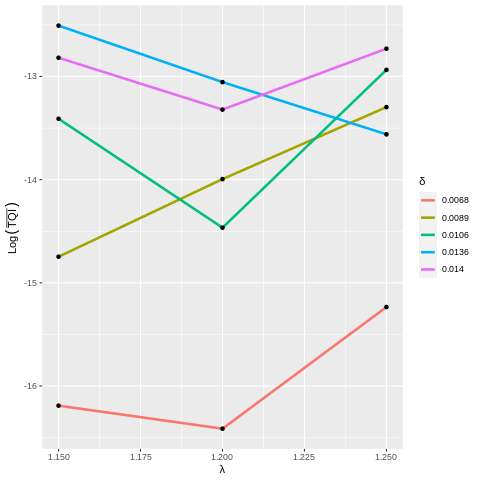

In [ ]:
%%R
library(dplyr)
library(ggplot2)

tabel %>% group_by(delta) %>% 
  ggplot(aes(x=lambda,y=log(tqi), color=factor(delta))) + geom_line(size=1.2) +
  geom_point(color='black')+
  labs(x=expression(lambda), y=expression(Log(bar(TQI))))+
  scale_color_discrete(expression(delta))

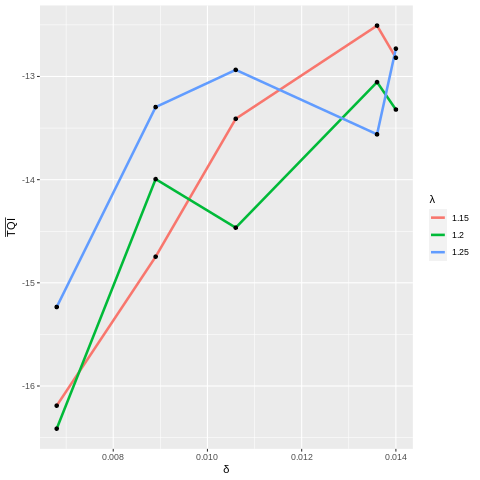

In [ ]:
%%R
tabel %>% group_by(lambda) %>% 
  ggplot(aes(x=delta,y=log(tqi), color=factor(lambda))) + geom_line(size=1.2) +
  geom_point(color='black')+
  labs(x=expression(delta), y=expression(bar(TQI)))+
  scale_color_discrete(expression(lambda))

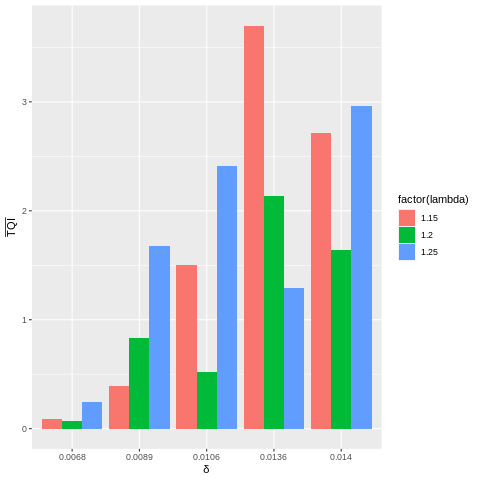

In [ ]:
%%R
library(ggplot2)
ggplot(tabel,aes(fill=factor(lambda),y=(tqi*1000000),x=factor(delta)))+
  geom_bar(position="dodge",stat="identity")+
  labs(x=expression(delta), y=expression(bar(TQI)))+
  scale_color_discrete(expression(lambda))

In [ ]:
%%R
q <- read.table('tqi.txt')
no <- 1:range(150)
q <- cbind(no,q)
head(q)

  no           V1           V2           V3           V4           V5
1  1 2.758676e-08 1.256185e-08 1.071787e-08 1.005856e-08 1.005856e-08
2  2 4.702129e-08 2.158728e-08 1.557668e-08 3.168323e-08 3.168323e-08
3  3 4.703697e-08 2.114424e-08 1.786111e-08 1.676603e-08 1.652599e-08
4  4 4.645023e-08 2.205885e-08 1.692478e-08 5.013745e-08 4.772290e-08
5  5 4.994016e-08 2.345947e-08 1.668832e-08 1.766510e-08 1.731224e-08
6  6 5.729025e-08 2.294563e-08 1.712775e-08 4.621069e-08 3.254526e-08
            V6           V7           V8           V9          V10          V11
1 2.795784e-08 1.384233e-08 1.109800e-08 1.000743e-08 1.000743e-08 2.758676e-08
2 4.500896e-08 2.023194e-08 1.535754e-08 3.349509e-08 3.349509e-08 4.702129e-08
3 4.711321e-08 2.087260e-08 1.621852e-08 5.931725e-08 5.931725e-08 4.703697e-08
4 5.024463e-08 2.198445e-08 1.605851e-08 3.849688e-08 4.188610e-08 4.645023e-08
5 5.054604e-08 2.230954e-08 1.650012e-08 5.588790e-08 5.205077e-08 4.994016e-08
6 5.642337e-08 2.456202e-08 1.

In [ ]:
%%R
head(q)[1:3,]

  no           V1           V2           V3           V4           V5
1  1 2.758676e-08 1.256185e-08 1.071787e-08 1.005856e-08 1.005856e-08
2  2 4.702129e-08 2.158728e-08 1.557668e-08 3.168323e-08 3.168323e-08
3  3 4.703697e-08 2.114424e-08 1.786111e-08 1.676603e-08 1.652599e-08
            V6           V7           V8           V9          V10          V11
1 2.795784e-08 1.384233e-08 1.109800e-08 1.000743e-08 1.000743e-08 2.758676e-08
2 4.500896e-08 2.023194e-08 1.535754e-08 3.349509e-08 3.349509e-08 4.702129e-08
3 4.711321e-08 2.087260e-08 1.621852e-08 5.931725e-08 5.931725e-08 4.703697e-08
           V12          V13          V14          V15
1 1.291176e-08 1.045174e-08 1.011543e-08 1.011543e-08
2 2.073779e-08 1.721496e-08 4.125466e-08 1.595119e-06
3 2.136243e-08 1.728273e-08 1.960569e-08 1.701901e-08


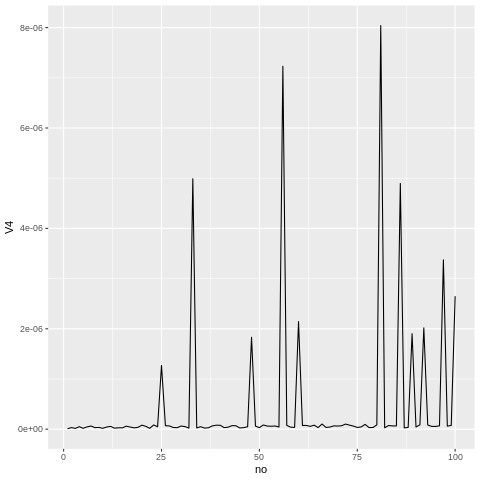

In [ ]:
%%R
library(ggplot2)
ggplot(q[1:100,],aes(x=no)) +
#geom_line(aes(y=V1)) +
#geom_line(aes(y=V2)) +
#geom_line(aes(y=V3)) +
geom_line(aes(y=V4))
#geom_line(aes(y=V5))
#geom_line(aes(y=V6),col='red')
#geom_line(aes(y=V7)) +
#geom_line(aes(y=V8)) +
#geom_line(aes(y=V9)) +
#geom_line(aes(y=V10)) +
#geom_line(aes(y=V11)) +
#geom_line(aes(y=V12)) +
#geom_line(aes(y=V13)) +
#geom_line(aes(y=V14)) +
#geom_line(aes(y=V15))


Pervandingan Waktu Komputasi

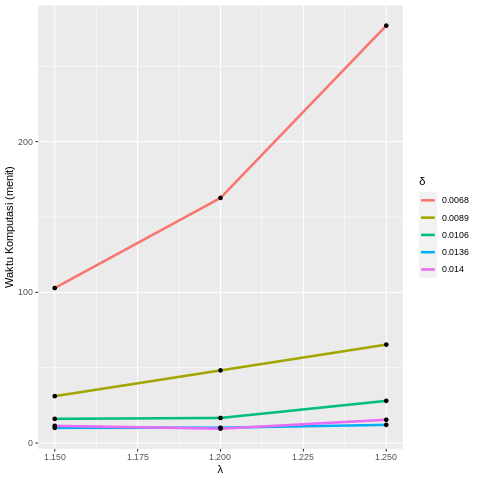

In [ ]:
%%R
tabel %>% group_by(delta) %>% 
  ggplot(aes(x=lambda,y=waktu, color=factor(delta))) + geom_line(size=1.2) +
  geom_point(color='black')+
  labs(x=expression(lambda), y='Waktu Komputasi (menit)')+
  scale_color_discrete(expression(delta))


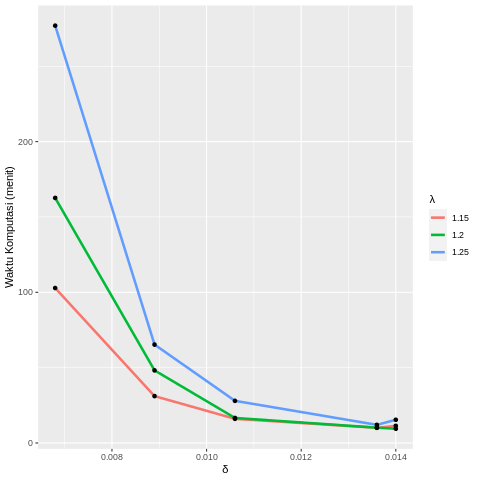

In [ ]:
%%R
tabel %>% group_by(lambda) %>% 
  ggplot(aes(x=delta,y=waktu, color=factor(lambda))) + geom_line(size=1.2) +
  geom_point(color='black')+
  labs(x=expression(delta), y='Waktu Komputasi (menit)')+
  scale_color_discrete(expression(lambda))

In [ ]:
#banyaknya 
np.count_nonzero(k6[:,0])

272

In [ ]:
np.count_nonzero(np.array([False,True,True,False]))

2

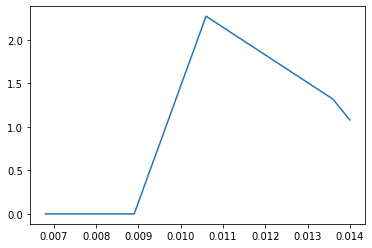

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tqi = np.array([4.7865e-07, 4.067e-07,2.272, 1.32, 1.08])
dt = np.array([0.0068, 0.0089, 0.0106, 0.0136, 0.014])

fig, ax = plt.subplots(1)
ax.plot(dt,tqi)

In [ ]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title'

## Analisis Simulasi 6

In [ ]:
np.where(Q6==np.sort(Q6)[0])

(array([0]),)

In [ ]:
#simulasi terbaik adalah pada simulasi 6
# 10 tricluster dengan TQI terkecil pada simulasi 6
for i in range(20):
  x = np.sort(Q6)[i]
  y = np.where(Q6 == x)
  y = y[0][0]
  yy = y+1
  print("tricluster {} -- TQI :{} -- ukuran :{} x {} x {}".format(yy,x,
                                                              np.count_nonzero(g6[y]),
                                                              np.count_nonzero(k6[y]),
                                                              np.count_nonzero(w6[y])))

tricluster 1 -- TQI :2.795784361571486e-08 -- ukuran :6735 x 3 x 12
tricluster 2 -- TQI :4.500895720246865e-08 -- ukuran :4384 x 3 x 10
tricluster 132 -- TQI :4.582531066778177e-08 -- ukuran :7783 x 2 x 7
tricluster 9 -- TQI :4.661072815336987e-08 -- ukuran :4562 x 3 x 9
tricluster 33 -- TQI :4.669400741668283e-08 -- ukuran :5817 x 2 x 10
tricluster 147 -- TQI :4.697065748754705e-08 -- ukuran :7567 x 2 x 7
tricluster 3 -- TQI :4.711321057194935e-08 -- ukuran :4169 x 3 x 10
tricluster 302 -- TQI :4.7172339946930034e-08 -- ukuran :11027 x 2 x 4
tricluster 30 -- TQI :4.758154056172541e-08 -- ukuran :5509 x 3 x 7
tricluster 177 -- TQI :4.801244392629391e-08 -- ukuran :9395 x 2 x 5
tricluster 159 -- TQI :4.8920013743298475e-08 -- ukuran :8257 x 2 x 6
tricluster 25 -- TQI :4.8999073633915614e-08 -- ukuran :4761 x 3 x 8
tricluster 15 -- TQI :4.9011878269864124e-08 -- ukuran :4751 x 3 x 8
tricluster 200 -- TQI :4.911235763069853e-08 -- ukuran :8020 x 2 x 6
tricluster 75 -- TQI :4.9511050773659

In [ ]:
cluster_waktu = [0,1,131,8,32,146,2,301,29,176,158,24,14,199,74]
for i in cluster_waktu:
  print('tricluster {} : {}'.format(i+1,np.nonzero(k6[i])))

tricluster 1 : (array([0, 1, 2]),)
tricluster 2 : (array([0, 1, 2]),)
tricluster 132 : (array([0, 1]),)
tricluster 9 : (array([0, 1, 2]),)
tricluster 33 : (array([1, 2]),)
tricluster 147 : (array([0, 1]),)
tricluster 3 : (array([0, 1, 2]),)
tricluster 302 : (array([1, 2]),)
tricluster 30 : (array([0, 1, 2]),)
tricluster 177 : (array([0, 1]),)
tricluster 159 : (array([0, 1]),)
tricluster 25 : (array([0, 1, 2]),)
tricluster 15 : (array([0, 1, 2]),)
tricluster 200 : (array([1, 2]),)
tricluster 75 : (array([0, 1]),)


In [ ]:
#np.intersect1d(np.nonzero(g6[6]),np.nonzero(g6[200]))
cluster_waktu = [0,1,131,8,32,146,2,301,29,176,158,24,14,199,74]
for i in cluster_waktu:
  print('tricluster {} : {}'.format(i,np.nonzero(w6[i])))


tricluster 0 : (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),)
tricluster 1 : (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)
tricluster 131 : (array([ 1,  3,  5,  6,  7,  9, 11]),)
tricluster 8 : (array([ 1,  2,  3,  4,  5,  6,  8,  9, 11]),)
tricluster 32 : (array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11]),)
tricluster 146 : (array([1, 2, 3, 5, 6, 7, 8]),)
tricluster 2 : (array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11]),)
tricluster 301 : (array([1, 5, 6, 8]),)
tricluster 29 : (array([0, 3, 5, 6, 7, 8, 9]),)
tricluster 176 : (array([0, 2, 3, 5, 7]),)
tricluster 158 : (array([ 3,  4,  5,  6,  7, 10]),)
tricluster 24 : (array([ 0,  1,  3,  4,  5,  6,  8, 10]),)
tricluster 14 : (array([ 0,  1,  3,  4,  6,  8,  9, 11]),)
tricluster 199 : (array([ 1,  4,  5,  6,  9, 11]),)
tricluster 74 : (array([ 0,  1,  3,  6,  7,  8,  9, 10]),)


In [ ]:
for i in range(12):
  print("waktu {} : {} --- {}".format(i,np.count_nonzero(w6[:,i]),np.count_nonzero(w6[:,i])/302))

waktu 0 : 128 --- 0.423841059602649
waktu 1 : 166 --- 0.5496688741721855
waktu 2 : 122 --- 0.40397350993377484
waktu 3 : 157 --- 0.5198675496688742
waktu 4 : 148 --- 0.4900662251655629
waktu 5 : 131 --- 0.4337748344370861
waktu 6 : 170 --- 0.5629139072847682
waktu 7 : 140 --- 0.46357615894039733
waktu 8 : 154 --- 0.5099337748344371
waktu 9 : 139 --- 0.4602649006622517
waktu 10 : 123 --- 0.40728476821192056
waktu 11 : 118 --- 0.39072847682119205


In [ ]:
w6.shape

(302, 12)

In [ ]:
# Jumlah Gen
n = D.shape[1]
 
i_sm_1 = np.array([])
for i in range(len(g1)):
  x = np.nonzero(g1[i])[0]
  i_sm_1 = np.union1d(i_sm_1,x)
sm_1 = i_sm_1.shape[0]/n 
print("gen yang dapat di temukan tricluster simulasi 1 :", sm_1)
 
i_sm_2 = np.array([])
for i in range(len(g2)):
  x = np.nonzero(g2[i])[0]
  i_sm_2 = np.union1d(i_sm_2,x)
sm_2 = i_sm_2.shape[0]/n
print("gen yang dapat di temukan tricluster simulasi 2 :", sm_2)
 
i_sm_3 = np.array([])
for i in range(len(g3)):
  x = np.nonzero(g3[i])[0]
  i_sm_3 = np.union1d(i_sm_3,x)
sm_3 = i_sm_3.shape[0]/n
print("gen yang dapat di temukan tricluster simulasi 3 :", sm_3)
 
i_sm_4 = np.array([])
for i in range(len(g4)):
  x = np.nonzero(g4[i])[0]
  i_sm_4 = np.union1d(i_sm_4,x)
sm_4 = i_sm_4.shape[0]/n
print("gen yang dapat di temukan tricluster simulasi 4 :", sm_4)
 
i_sm_5 = np.array([])
for i in range(len(g5)):
  x = np.nonzero(g5[i])[0]
  i_sm_5 = np.union1d(i_sm_5,x)
sm_5 = i_sm_5.shape[0]/n
print("gen yang dapat di temukan tricluster simulasi 5 :", sm_5)
 
i_sm_6 = np.array([])
for i in range(len(g6)):
  x = np.nonzero(g6[i])[0]
  i_sm_6 = np.union1d(i_sm_6,x)
sm_6 = i_sm_6.shape[0]/n
print("gen yang dapat di temukan tricluster simulasi 6 :", sm_6)

gen yang dapat di temukan tricluster simulasi 1 : 0.6620699547158986
gen yang dapat di temukan tricluster simulasi 2 : 0.8381042149048215
gen yang dapat di temukan tricluster simulasi 3 : 0.7898080036063356
gen yang dapat di temukan tricluster simulasi 4 : 0.8782042087576584
gen yang dapat di temukan tricluster simulasi 5 : 0.8719545929553512
gen yang dapat di temukan tricluster simulasi 6 : 0.7298321824478003


In [ ]:
for i in range(len(g6)):
  print("Tricluster ke {}:  gene X kondisi X waktu = {} X {} X {}".format(i+1,
                                                                          np.count_nonzero(g6[i]),
                                                                          np.count_nonzero(k6[i]),
                                                                          np.count_nonzero(w6[i])))

Tricluster ke 1:  gene X kondisi X waktu = 6735 X 3 X 12
Tricluster ke 2:  gene X kondisi X waktu = 4384 X 3 X 10
Tricluster ke 3:  gene X kondisi X waktu = 4169 X 3 X 10
Tricluster ke 4:  gene X kondisi X waktu = 3911 X 3 X 10
Tricluster ke 5:  gene X kondisi X waktu = 3891 X 3 X 10
Tricluster ke 6:  gene X kondisi X waktu = 3467 X 3 X 10
Tricluster ke 7:  gene X kondisi X waktu = 3393 X 3 X 10
Tricluster ke 8:  gene X kondisi X waktu = 4298 X 3 X 9
Tricluster ke 9:  gene X kondisi X waktu = 4562 X 3 X 9
Tricluster ke 10:  gene X kondisi X waktu = 4578 X 3 X 8
Tricluster ke 11:  gene X kondisi X waktu = 4572 X 3 X 8
Tricluster ke 12:  gene X kondisi X waktu = 3070 X 3 X 9
Tricluster ke 13:  gene X kondisi X waktu = 3804 X 3 X 8
Tricluster ke 14:  gene X kondisi X waktu = 4441 X 3 X 8
Tricluster ke 15:  gene X kondisi X waktu = 4751 X 3 X 8
Tricluster ke 16:  gene X kondisi X waktu = 3848 X 3 X 8
Tricluster ke 17:  gene X kondisi X waktu = 2665 X 3 X 9
Tricluster ke 18:  gene X kondisi

In [ ]:
print("banyaknya Tricluster tercover pada setiap kondisi")
for i in range(3):
  print("kondisi {} : {}".format(i+1, np.count_nonzero(k6[:,i])))

print("\nbanyaknya Tricluster tercover pada setiap waktu")
for i in range(12):
  print("waktu {} : {}".format(i+1, np.count_nonzero(w6[:,i])))

banyaknya Tricluster tercover pada setiap kondisi
kondisi 1 : 272
kondisi 2 : 276
kondisi 3 : 262

banyaknya Tricluster tercover pada setiap waktu
waktu 1 : 128
waktu 2 : 166
waktu 3 : 122
waktu 4 : 157
waktu 5 : 148
waktu 6 : 131
waktu 7 : 170
waktu 8 : 140
waktu 9 : 154
waktu 10 : 139
waktu 11 : 123
waktu 12 : 118


In [ ]:
for i in range(len(g15)):
  print("{}\{}\{}X{}X{}".format(i+1, np.log10(Q15[i]),
                                                                          np.count_nonzero(g15[i]),
                                                                          np.count_nonzero(k15[i]),
                                                                          np.count_nonzero(w15[i])))

1\-7.995015546779205\32402X3X12
2\-5.797207010053816\227X3X12
3\-7.769065596987977\25044X3X7
4\-7.322832928080532\6904X3X7
5\-7.760312907503188\23403X3X7
6\-7.518484245203914\11352X3X7
7\-7.195642541165691\4804X3X7
8\-7.445658026294031\11615X3X6
9\-7.259278363244768\5688X3X7
10\-7.525169952400148\13736X3X6
11\-7.393845285508505\9319X3X6
12\-7.311265754073249\7795X3X6
13\-7.560496548816879\15230X3X6
14\-7.317913901529365\9602X2X7
15\-7.31487154787436\7805X3X6
16\-7.587075696960369\24782X2X6
17\-7.604051719919063\21599X3X5
18\-5.4538783601189635\173X3X6
19\-7.316273618917239\8235X3X6
20\-7.359677552254418\12853X2X6
21\-7.6902319064172975\23004X3X6
22\-7.137276607121885\4010X3X7
23\-7.201855832698827\5641X3X6
24\-7.326084653451464\9034X3X5
25\-7.4458725667513495\11071X3X6
26\-7.149102532921809\5641X3X5
27\-7.605772751598157\18151X3X6
28\-7.634298626057378\22733X3X5
29\-7.537237111523134\21797X3X4
30\-7.575144498498632\19865X3X5
31\-7.1644832624210135\5054X3X6
32\-7.5094059141477185\15284X

## Simulasi 1

In [ ]:
#simulasi terbaik adalah pada simulasi 1
# 10 tricluster dengan TQI terkecil pada simulasi 6
for i in range(10):
  x = np.sort(Q1)[i]
  y = np.where(Q1 == x)
  y = y[0][0]
  yy = y+1
  print("tricluster {} -- TQI :{} -- ukuran :{} x {} x {}".format(yy,x,
                                                              np.count_nonzero(g1[y]),
                                                              np.count_nonzero(k1[y]),
                                                              np.count_nonzero(w1[y])))

tricluster 1 -- TQI :2.7586763915153866e-08 -- ukuran :6847 x 3 x 12
tricluster 116 -- TQI :4.623131913636454e-08 -- ukuran :7463 x 3 x 5
tricluster 4 -- TQI :4.6450226184393754e-08 -- ukuran :4670 x 3 x 9
tricluster 8 -- TQI :4.6747469812916686e-08 -- ukuran :4578 x 3 x 9
tricluster 84 -- TQI :4.69014952144051e-08 -- ukuran :6272 x 3 x 6
tricluster 2 -- TQI :4.702129383788111e-08 -- ukuran :4165 x 3 x 10
tricluster 3 -- TQI :4.703697348984933e-08 -- ukuran :4177 x 3 x 10
tricluster 45 -- TQI :4.715826812756792e-08 -- ukuran :5492 x 3 x 7
tricluster 13 -- TQI :4.739426147144677e-08 -- ukuran :4911 x 3 x 8
tricluster 9 -- TQI :4.761581846458363e-08 -- ukuran :4927 x 3 x 8


In [ ]:
no_tric = [1,116,4,8,84,2,3,45,13,9]
for i in no_tric:
  x = i-1
  print('tricluster {} : {}'.format(i,np.nonzero(w1[x])))

tricluster 1 : (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),)
tricluster 116 : (array([ 3,  6,  7,  8, 10]),)
tricluster 4 : (array([ 0,  1,  2,  3,  6,  7,  8,  9, 10]),)
tricluster 8 : (array([ 0,  1,  3,  4,  5,  6,  7,  8, 10]),)
tricluster 84 : (array([3, 4, 6, 7, 8, 9]),)
tricluster 2 : (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)
tricluster 3 : (array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11]),)
tricluster 45 : (array([1, 2, 3, 4, 6, 7, 8]),)
tricluster 13 : (array([ 1,  3,  4,  6,  7,  8,  9, 11]),)
tricluster 9 : (array([ 1,  2,  3,  4,  6,  8,  9, 10]),)


In [ ]:
for i in range(len(g1)):
  print("{}\{}\{}X{}X{}".format(i+1, np.log10(Q1[i]),
                                                                          np.count_nonzero(g1[i]),
                                                                          np.count_nonzero(k1[i]),
                                                                          np.count_nonzero(w1[i])))

1\-7.559299241754231\6847X3X12
2\-7.327705425000074\4165X3X10
3\-7.327560629936663\4177X3X10
4\-7.333012166914797\4670X3X9
5\-7.301550073789692\3938X3X10
6\-7.241919310802342\3776X3X9
7\-7.272274826222486\3979X3X9
8\-7.330241890160987\4578X3X9
9\-7.322248746215779\4927X3X8
10\-7.247444456746185\3723X3X9
11\-7.242152574758228\4094X3X8
12\-7.297839178904175\4636X3X8
13\-7.324274239806044\4911X3X8
14\-7.300331050229065\4690X3X8
15\-7.270033902300948\3922X3X9
16\-7.291272265370089\4158X3X9
17\-7.2451754490021845\4139X3X8
18\-7.2796363099569055\4399X3X8
19\-7.140277111980646\3069X3X8
20\-7.2530930154606015\4149X3X8
21\-7.275930577270723\4392X3X8
22\-7.2441887194433905\4108X3X8
23\-7.229113506329697\3961X3X8
24\-7.1058447400824125\2562X3X9
25\-7.2284915906813465\4275X3X7
26\-7.05119789543269\2267X3X9
27\-7.116995906924403\2662X3X9
28\-7.134413069496941\3047X3X8
29\-7.178559018179178\3400X3X8
30\-7.123073603213672\3015X3X8
31\-7.150403367337338\3162X3X8
32\-7.226661528122076\3901X3X8
33\-7.00

In [ ]:
!neofetch

            .-/+oossssoo+/-. 
        `:+ssssssssssssssssss+:` 
      -+ssssssssssssssssssyyssss+- 
    .ossssssssssssssssssdMMMNysssso. 
   /ssssssssssshdmmNNmmyNMMMMhssssss/ 
  +ssssssssshmydMMMMMMMNddddyssssssss+ 
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/ 
.ssssssssdMMMNhsssssssssshNMMMdssssssss. 
+sssshhhyNMMNyssssssssssssyNMMMysssssss+ 
ossyNMMMNyMMhsssssssssssssshmmmhssssssso 
ossyNMMMNyMMhsssssssssssssshmmmhssssssso 
+sssshhhyNMMNyssssssssssssyNMMMysssssss+ 
.ssssssssdMMMNhsssssssssshNMMMdssssssss. 
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/ 
  +sssssssssdmydMMMMMMMMddddyssssssss+ 
   /ssssssssssshdmNNNNmyNMMMMhssssss/ 
    .ossssssssssssssssssdMMMNysssso. 
      -+sssssssssssssssssyyyssss+- 
        `:+ssssssssssssssssss+:` 
            .-/+oossssoo+/-. 
root@f47eb401fa0e 
----------------- 
OS: Ubuntu 18.04.3 LTS on Chrome OS x86_64 
Host: Google Compute Engine 
Kernel: 4.19.104+ 
Uptime: 19 mins 
Packages: 1225 
Shell: bash 4.4.20 
Terminal: jupyter-noteboo 
CPU: Intel Xeon (2) @ 